In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [3]:
df_can = pd.read_excel('C:/Users/RGRK/OneDrive/Desktop/Work/BA/Data Analysis and Visualization with Python/DataViz Exercise files/CanadaImigrants.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [4]:
##Data Cleanup

In [9]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df_can.drop(['Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46','Unnamed: 47','Unnamed: 48',
            'Unnamed: 49','Unnamed: 50'], axis=1, inplace=True)
df_can.columns = list(map(str, df_can.columns))
df_can.set_index('Country', inplace=True)
df_can['Total'] = df_can.sum(axis=1)
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

KeyError: "['AREA' 'REG' 'DEV' 'Type' 'Coverage'] not found in axis"

In [6]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.3.4


In [11]:
df_can.drop(['Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46','Unnamed: 47','Unnamed: 48',
            'Unnamed: 49','Unnamed: 50'], axis=1, inplace=True)

In [12]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639.0
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699.0
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439.0
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6.0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15.0


In [13]:
df_continents=df_can.groupby('Continent', axis=0)

In [15]:
df_continents=df_continents.sum()

In [23]:
type(df_continents)

pandas.core.frame.DataFrame

In [26]:
df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948.0
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794.0
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947.0
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148.0
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142.0


In [27]:
df_continents['Total']

Continent
Africa                              618948.0
Asia                               3317794.0
Europe                             1410947.0
Latin America and the Caribbean     765148.0
Northern America                    241142.0
Oceania                              55174.0
Name: Total, dtype: float64

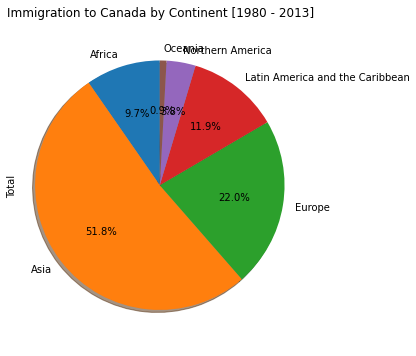

In [33]:
df_continents['Total'].plot(kind='pie', figsize=(5,6),autopct='%1.1f%%',startangle=90,shadow=True)
plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

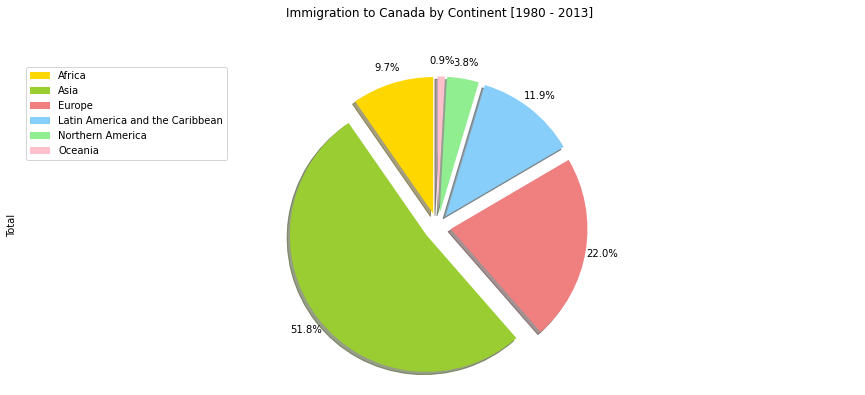

In [36]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

In [37]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639.0
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699.0
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439.0
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6.0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15.0


In [42]:
df_cont=df_can.groupby('Continent', axis=0).sum()

In [50]:
df_cont=df_cont['2013']

KeyError: '2013'

In [52]:
df_cont

Continent
Africa                              38543
Asia                               155075
Europe                              28691
Latin America and the Caribbean     24950
Northern America                     8503
Oceania                              1775
Name: 2013, dtype: int64

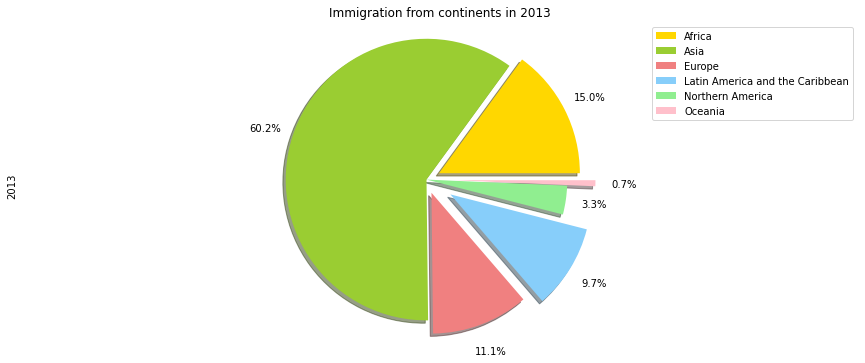

In [84]:
colors_list=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list=[0.1,0,0.1,0.2,0,0.2]

df_cont.plot(kind='pie',figsize=(15,6), autopct='%1.1f%%',shadow=True,startangle=0,pctdistance=1.2,labels=None,
            colors=colours_list,
            explode=explode_list)
plt.title('Immigration from continents in 2013',y=1)
plt.axis('equal')
plt.legend(labels=df_cont.index, loc="upper right")

In [85]:
##BOXPLOTS

In [89]:
df_can

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639.0
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699.0
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439.0
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6.0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146.0
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2.0
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985.0


In [100]:
df_japan=df_can.loc[['Japan'],years].transpose()

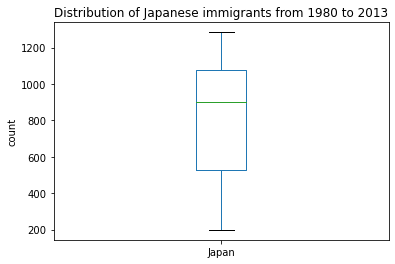

In [107]:
df_japan.plot(kind='box')
plt.title('Distribution of Japanese immigrants from 1980 to 2013')
plt.ylabel('count')
plt.show()

In [105]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [112]:
df_ic=df_can.loc[['India','China'],years].transpose()

In [113]:
df_ic.describe()

Country,India,China
count,34.000000,34.000000
mean,20350.117647,19410.647059
std,10007.342579,13568.230790
min,4211.000000,1527.000000
25%,10637.750000,5512.750000
50%,20235.000000,19945.000000
75%,28699.500000,31568.500000
max,36210.000000,42584.000000


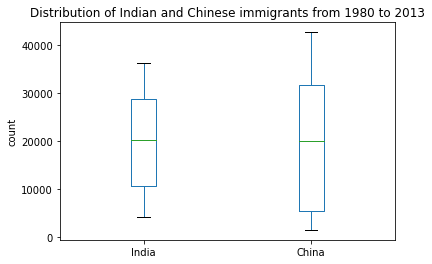

In [118]:
df_ic.plot(kind='box')
plt.title('Distribution of Indian and Chinese immigrants from 1980 to 2013')
plt.ylabel('count')
plt.show()

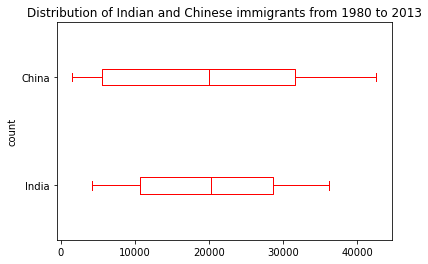

In [122]:
df_ic.plot(kind='box',vert=False,color='red')
plt.title('Distribution of Indian and Chinese immigrants from 1980 to 2013')
plt.ylabel('count')
plt.show()

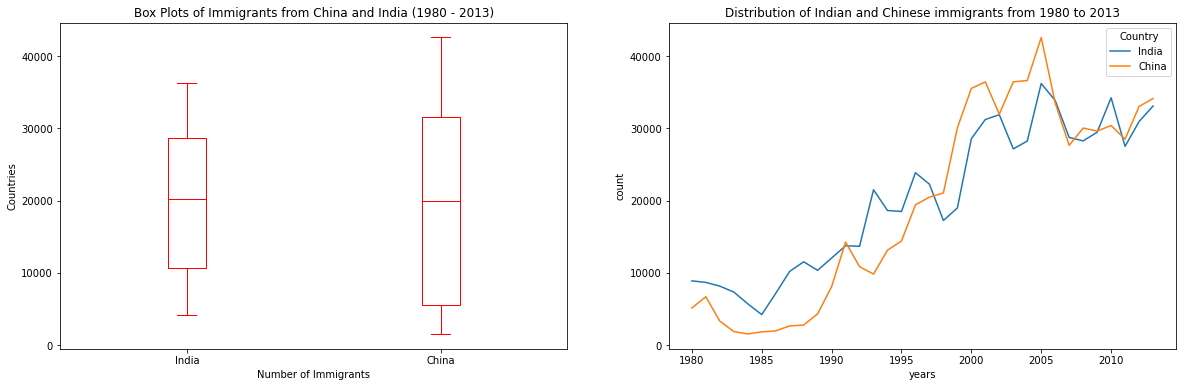

In [149]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)
#Subplot1
df_ic.plot(kind='box',color='red',figsize=(20,6),ax=ax0)
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)',y=1)
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')
#Subplot2
df_ic.plot(kind='line',ax=ax1)
ax1.set_title('Distribution of Indian and Chinese immigrants from 1980 to 2013',y=1)
ax1.set_ylabel('count')
ax1.set_xlabel('years')
plt.show()

In [150]:
#Question: Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) 
#grouped by the decades 1980s, 1990s, and 2000s.

#Step 1: Get the dataset. Get the top 15 countries based on Total immigrant population. Name the dataframe df_top15.

In [163]:
df_top15=df_can.sort_values('Total',axis=0).tail(15)

In [165]:
df_top15.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Romania,Europe,Eastern Europe,Developed regions,375,438,583,543,524,604,656,...,5048,4468,3834,2837,2076,1922,1776,1588,1512,93585.0
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146.0
Jamaica,Latin America and the Caribbean,Caribbean,Developing regions,3198,2634,2661,2455,2508,2938,4649,...,1945,1722,2141,2334,2456,2321,2059,2182,2479,106431.0
France,Europe,Western Europe,Developed regions,1729,2027,2219,1490,1169,1177,1298,...,4429,4002,4290,4532,5051,4646,4080,6280,5623,109091.0
Lebanon,Asia,Western Asia,Developing regions,1409,1119,1159,789,1253,1683,2576,...,3709,3802,3467,3566,3077,3432,3072,1614,2172,115359.0


In [182]:
list_80=list(map(str,range(1980,1990)))
list_90=list(map(str,range(1991,2000)))
list_00=list(map(str,range(2001,2014)))

In [191]:
df_80=df_top15[list_80].sum(axis=1)
df_90=df_top15[list_90].sum(axis=1)
df_00=df_top15[list_00].sum(axis=1)

In [192]:
new_df=pd.DataFrame({'1980':df_80,'1990':df_90,'2000':df_00})

In [193]:
new_df

,1980,1990,2000
Country,,,
Romania,7613,31407,47774
Viet Nam,30638,33925,26979
Jamaica,34328,35384,29292
France,17137,27851,58161
Lebanon,24918,35677,39293
Poland,57602,47824,15304
Republic of Korea,16259,36102,80515
Sri Lanka,14796,66896,57060
Iran (Islamic Republic of),21477,51216,93691


<AxesSubplot:>

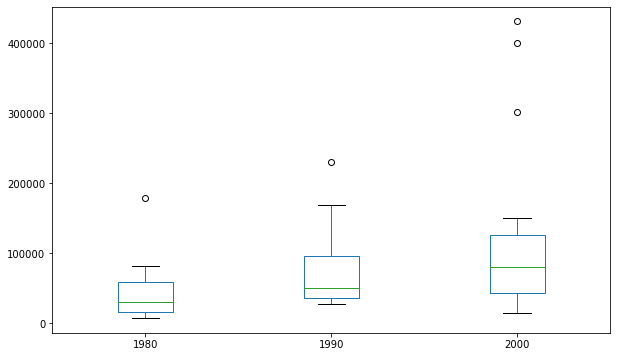

In [196]:
new_df.plot(kind='box', figsize=(10,6))

In [197]:
new_df.describe()

,1980,1990,2000
count,15.000000,15.000000,15.000000
mean,44418.333333,77214.266667,128994.400000
std,44190.676455,62131.206425,135851.771558
min,7613.000000,27851.000000,15304.000000
25%,16698.000000,35530.500000,43533.500000
50%,30638.000000,51023.000000,80515.000000
75%,59183.000000,96434.500000,126128.500000
max,179171.000000,230298.000000,430902.000000


In [201]:
new_df[new_df['2000']> 209611.5]## let's check how many entries fall above the outlier threshold
#China and India are both considered as outliers since their population for the decade exceeds 209,611.5.

,1980,1990,2000
Country,,,
Philippines,60764,125973,301382
China,32003,153452,430902
India,82154,168354,400783


In [206]:
####SCATTER PLOT

In [207]:
df_can['Total']

Country
Afghanistan       58639.0
Albania           15699.0
Algeria           69439.0
American Samoa        6.0
Andorra              15.0
                   ...   
Viet Nam          97146.0
Western Sahara        2.0
Yemen              2985.0
Zambia             1677.0
Zimbabwe           8598.0
Name: Total, Length: 195, dtype: float64

In [210]:
df_can[years].sum(axis=0)

1980     99137
1981    110563
1982    104271
1983     75550
1984     73417
1985     69978
1986     86048
1987    134771
1988    139306
1989    164432
1990    188054
1991    207509
1992    221687
1993    222049
1994    193665
1995    187712
1996    200085
1997    192885
1998    160727
1999    179818
2000    216712
2001    242643
2002    223111
2003    217297
2004    232083
2005    257457
2006    247057
2007    232405
2008    243047
2009    248768
2010    276956
2011    246194
2012    256222
2013    257537
dtype: int64

In [211]:
df_tot=df_can[years].sum(axis=0)

In [214]:
df_tot.index=df_tot.index.map(int)

In [215]:
df_tot.index

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013],
           dtype='int64')

In [218]:
type(df_tot)

pandas.core.series.Series

In [223]:
df_tot.columns=['years','Total Population']

In [227]:
df_tot.index =map(int, df_tot.index)

In [228]:
df_tot.index

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013],
           dtype='int64')

In [229]:
df_tot

1980     99137
1981    110563
1982    104271
1983     75550
1984     73417
1985     69978
1986     86048
1987    134771
1988    139306
1989    164432
1990    188054
1991    207509
1992    221687
1993    222049
1994    193665
1995    187712
1996    200085
1997    192885
1998    160727
1999    179818
2000    216712
2001    242643
2002    223111
2003    217297
2004    232083
2005    257457
2006    247057
2007    232405
2008    243047
2009    248768
2010    276956
2011    246194
2012    256222
2013    257537
dtype: int64

In [231]:
df_tot.columns = ['year', 'total']

In [232]:
df_tot.head()

1980     99137
1981    110563
1982    104271
1983     75550
1984     73417
dtype: int64

In [233]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


In [234]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

In [242]:
df_tot.reset_index(inplace=True)

In [248]:
df_tot.columns=['Years','Total Population']

In [ ]:
df_tot

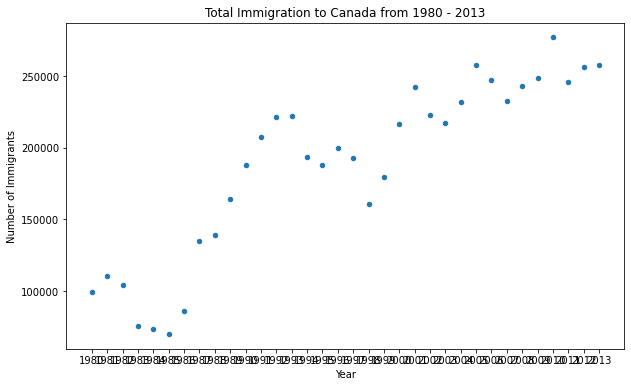

In [253]:
df_tot.plot(kind='scatter', x='Years', y='Total Population', figsize=(10,6))
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [258]:
##BUBBLE PLOTS

In [260]:
df_can_t = df_can[years].transpose() # transposed dataframe

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

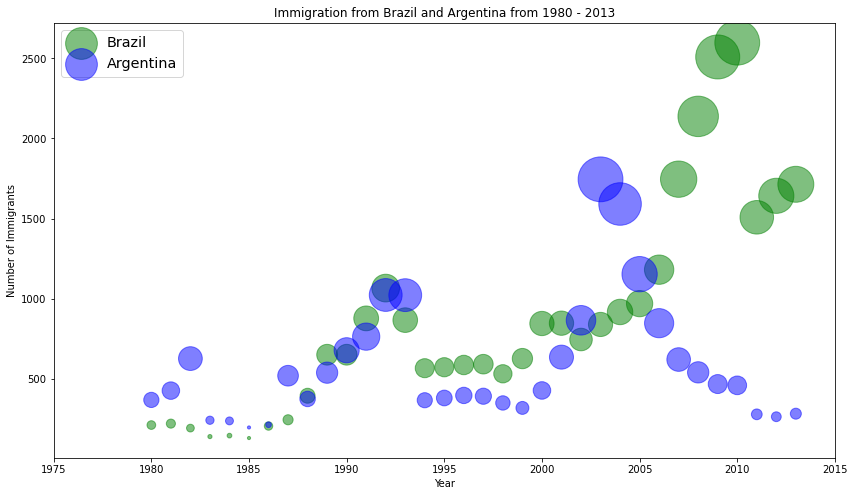

In [261]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

In [262]:
#Let's analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil. Let's do that using a bubble plot of immigration from Brazil and Argentina for the years 1980 - 2013. 
#We will set the weights for the bubble as the normalized value of the population for each year.

In [279]:
df_ab1=pd.DataFrame(df_can.loc[['Brazil','Argentina'],years].transpose())

In [281]:
df_ab1.index

Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013'],
      dtype='object')

In [282]:
df_ab1.index=df_ab1.index.map(int)

In [285]:
df_ab1.index.name='Year'

In [286]:
df_ab1.head()

Country,Brazil,Argentina
Year,,
1980,211,368
1981,220,426
1982,192,626
1983,139,241
1984,145,237


In [287]:
df_ab1.reset_index(inplace=True)

In [288]:
df_ab1.head()

Country,Year,Brazil,Argentina
0,1980,211,368
1,1981,220,426
2,1982,192,626
3,1983,139,241
4,1984,145,237


In [289]:
df_can_t = df_can[years].transpose() # transposed dataframe

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32
